In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import seaborn as sns

# Series

In [3]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [4]:
list(s.index)

[0, 1, 2, 3]

In [5]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [6]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [7]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population", index=["Stockholm", "London", "Rome", "Paris"])
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [8]:
s["Stockholm"]

909976

In [9]:
s[["Paris", "London"]]

Paris     2273305
London    8615246
Name: Population, dtype: int64

In [10]:
s.mean(), s.median(), s.std()

(3667653.25, 2572695.5, 3399048.5005155364)

In [11]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

<Axes: title={'center': 'pie'}, ylabel='Population'>

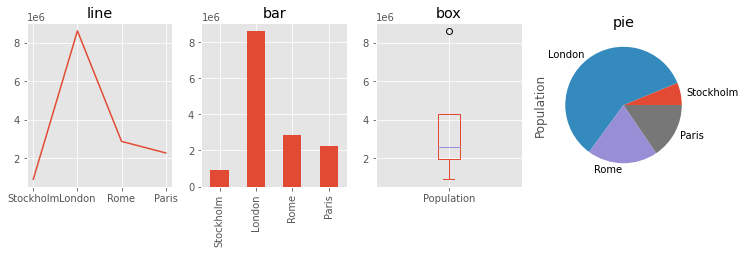

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

# DataFrame

In [13]:
df = pd.DataFrame([[909976, "Sweden"], [8615246, "UK"], [2872086, "Italy"], [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,UK
2,2872086,Italy
3,2273305,France


In [14]:
df = pd.DataFrame([[909976, "Sweden"], [8615246, "UK"], [2872086, "Italy"], [2273305, "France"]], index=["Stockholm", "London", "Rome", "Paris"], columns=["Population", "State"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,UK
Rome,2872086,Italy
Paris,2273305,France


In [15]:
# passing dictionary
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305], "State": ["Sweden", "United Kingdom", "Italy", "France"]}, index=["Stockholm", "London", "Rome", "Paris"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [16]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [17]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [18]:
df.loc[["Rome", "London"]]

,Population,State
Rome,2872086,Italy
London,8615246,United Kingdom


In [19]:
df.loc[["Rome", "London"], "Population"]

Rome      2872086
London    8615246
Name: Population, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [21]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [22]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [24]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [26]:
df_pop["NumericalPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [27]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [28]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericalPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [29]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericalPopulation         int64
dtype: object

In [30]:
df_pop2 = df_pop.set_index("City")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [34]:
# having two hierarchical indices
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head()

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   

                       NumericalPopulation  
State    City                               
Austria  Vienna                    1794770  
Belgium  Antwerp                    510610  
         Brussels[17]              1175831  
Bulgaria Plovdiv                    341041  
         Sofia                     1291895

In [38]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericalPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [40]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericalPopulation               528014
Name: (Sweden, Gothenburg), dtype: object

In [41]:
# sort by column
df_pop.set_index("City").sort_values(["State", "NumericalPopulation"], ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericalPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [42]:
# how many values of each category a column contains
city_counts = df_pop.State.value_counts()
city_counts.head(10)

State
Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
France             5
Netherlands        4
Bulgaria           3
Sweden             3
Romania            3
Name: count, dtype: int64

In [43]:
# A related question is how large the total population of all cities within
# a state is.
# create hierarchical index and use sum method
df_pop3 = df_pop[["State", "City", "NumericalPopulation"]].set_index(["State", "City"])
df_pop3.head()

,,NumericalPopulation
State,City,
United Kingdom,London[2],8615246
Germany,Berlin,3437916
Spain,Madrid,3165235
Italy,Rome,2872086
France,Paris,2273305


In [51]:
# using groupby
df_pop4 = (df_pop.drop("Rank", axis=1)).groupby("State").sum().sort_values("NumericalPopulation", ascending=False)

In [52]:
df_pop4.head()

,City,Population,Date of census/estimate,NumericalPopulation
State,,,,
United Kingdom,London[2]BirminghamLeedsGlasgowSheffieldBradfo...,"8,615,2461,092,330757,655596,550557,382524,619...",1 June 201430 June 201330 June 201231 December...,16011877
Germany,BerlinHamburg[10]MunichCologneFrankfurtStuttga...,"3,437,9161,746,3421,407,8361,034,175701,350604...",31 May 201430 December 201331 December 201331 ...,15119548
Spain,MadridBarcelonaValenciaSevilleZaragozaMálagaMu...,"3,165,2351,602,386786,424696,676666,058566,913...",1 January 20141 January 20141 January 20141 Ja...,10041639
Italy,RomeMilanNaplesTurinPalermoGenoaBolognaFlorenc...,"2,872,0861,332,516989,845898,095677,015594,774...",30 September 201430 September 201430 September...,8764067
Poland,WarsawKrakówŁódźWrocławPoznańGdańskSzczecinByd...,"1,729,119760,700709,757632,432547,161460,35440...",31 March 201431 March 201431 March 201431 Marc...,6267409


Text(0.5, 0, 'Total pop. in top 105 cities')

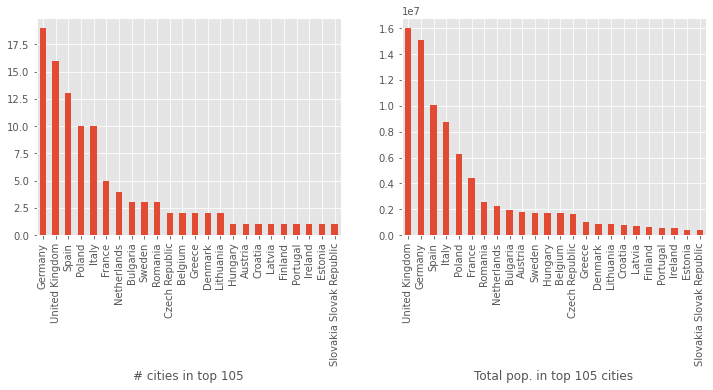

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
city_counts.plot(kind="bar", ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop4.NumericalPopulation.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")